# Imports

In [59]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

print(tf.__version__)

2.10.0


# Load training images
Load images from the [assets] folder and scan them into arrays.

In [200]:
# List of all directories of training data
dirs = ["0123", "1032", "1230", "2013", "3102"]
# Path to traning data
path = "../assets/train/"
# First file to analyze '0' is the first file in each directory
file_start = 0

# Number of files in each directory to load
file_count = 1500

# Last file to load in each directory
file_end = file_start + file_count

image_width = 128
image_height = 128

# Pre-allocate a large numpy array to store training data
training_images = np.zeros((file_count * len(dirs), image_width, image_height))

# Store labels for the training images
training_labels = np.zeros(file_count * len(dirs))

# Missing offset (If file fails to open, avoid including empty arrays in the testing set with this offset)
miss = 0

# Iterate through each directory, loading [file_count] images from each into the [training_images] array
for i in range(len(dirs)):
  for j in range(file_start, file_end):
    # Parse a path for the file to load
    in_path = path + dirs[i] + "/" + f'{j:05d}' + ".png"
    try:
      # Graryscale the image to reduce data size given to the machine
      im = ImageOps.grayscale(Image.open(in_path))
    except FileNotFoundError:
      print("File not found:")
      print(in_path)
      miss += 1
      continue
    # Add images to training data
    training_images[i*file_count + j - miss] = np.asarray(im, dtype=np.uint8)/255 # Normalize
    # Add label
    if dirs[i] == "0123":
      # Assign '1' for correct-ordered image
      training_labels[i*file_count + j - miss] = 1
    else:
      # Assign '0' for incorrect-ordered image
      training_labels[i*file_count + j - miss] = 0 

print(miss)
# Trim missing data off of the training data
training_images.resize((file_count * len(dirs) - miss, image_width, image_height))
training_labels.resize((file_count * len(dirs) - miss))

# Convert to unsigned integer
training_labels = training_labels.astype(np.uint8)


File not found:
../assets/train/1032/00000.png
File not found:
../assets/train/1032/00014.png
File not found:
../assets/train/1032/00028.png
File not found:
../assets/train/1032/00048.png
File not found:
../assets/train/1032/00049.png
File not found:
../assets/train/1032/00058.png
File not found:
../assets/train/1032/00059.png
File not found:
../assets/train/1032/00060.png
File not found:
../assets/train/1032/00061.png
File not found:
../assets/train/1032/00062.png
File not found:
../assets/train/1032/00063.png
File not found:
../assets/train/1032/00064.png
File not found:
../assets/train/1032/00065.png
File not found:
../assets/train/1032/00066.png
File not found:
../assets/train/1032/00067.png
File not found:
../assets/train/1032/00070.png
File not found:
../assets/train/1032/00071.png
File not found:
../assets/train/1032/00072.png
File not found:
../assets/train/1032/00073.png
File not found:
../assets/train/1032/00074.png
File not found:
../assets/train/1032/00075.png
File not foun

# Preprocessing

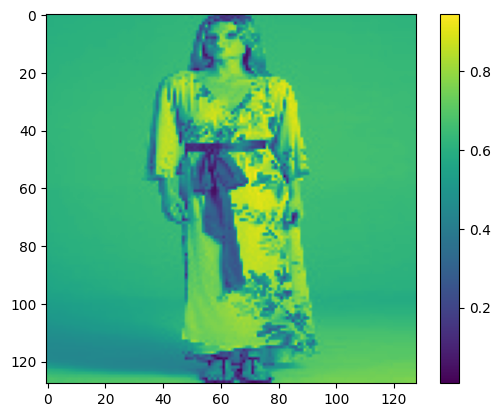

(4735, 128, 128)

In [201]:
plt.figure()
plt.imshow(training_images[999])
plt.colorbar()
plt.grid(False)
plt.show()
training_images.shape
# type(training_labels[1])

# Class names

In [203]:
class_names = ['Incorrect', 'Correct']

# Show additional images

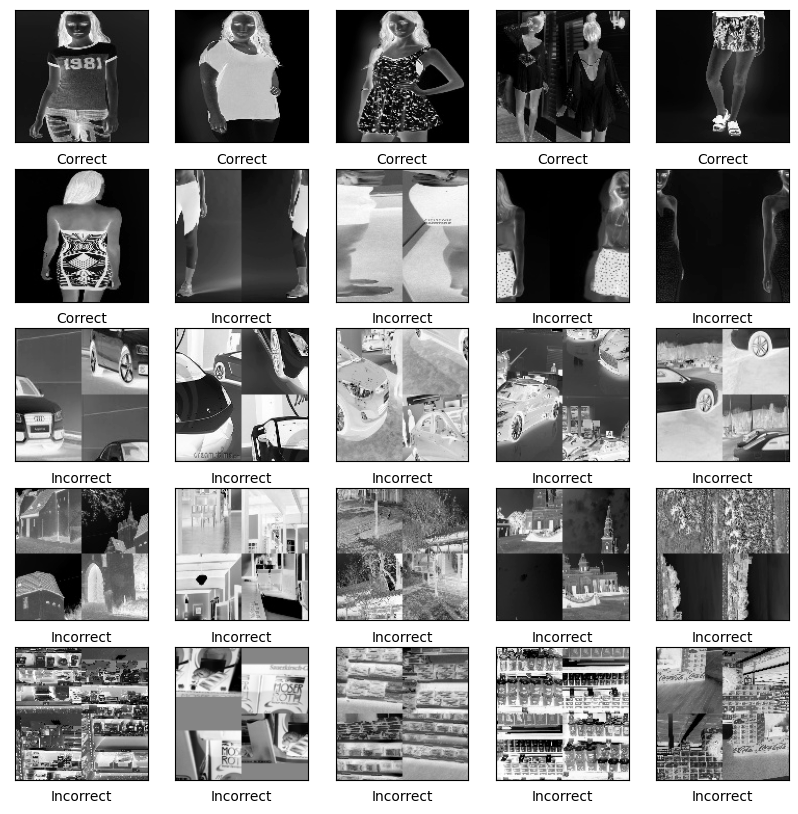

In [207]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i*(int(len(training_labels)/25))], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i*(int(len(training_labels)/25))]])
plt.show()

# Setting up the layers

In [208]:
model = tf.keras.Sequential([
    # Unstacks the pixel rows of the images and lines them end to end 28x28 -> 784 pixels
    tf.keras.layers.Flatten(input_shape=(image_width, image_height)),
    # Densely connected nural net with 128 notes
    tf.keras.layers.Dense(128, activation='relu'),
    # Less dense 
    tf.keras.layers.Dense(10)
])

# Compile stage

In [209]:
model.compile(optimizer='adam', # Determines the way the model is updated
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Loss function, measures model accuracy
              metrics=['accuracy']) # Show metrics data

# Fit and train model

In [211]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1139 - accuracy: 0.9662
Epoch 2/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1212 - accuracy: 0.9620
Epoch 3/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1266 - accuracy: 0.9605
Epoch 4/10
148/148 [==============================] - 1s 8ms/step - loss: 0.0934 - accuracy: 0.9713
Epoch 5/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1272 - accuracy: 0.9571
Epoch 6/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1178 - accuracy: 0.9622
Epoch 7/10
148/148 [==============================] - 1s 8ms/step - loss: 0.0804 - accuracy: 0.9759
Epoch 8/10
148/148 [==============================] - 1s 8ms/step - loss: 0.1112 - accuracy: 0.9637
Epoch 9/10
148/148 [==============================] - 1s 8ms/step - loss: 0.0789 - accuracy: 0.9742
Epoch 10/10
148/148 [==============================] - 1s 8ms/step - loss: 0.0631 - accuracy: 0.9799

# Generate testing data

In [224]:
# First file to analyze '0' is the first file in each directory
file_start_test = file_count

# Number of files in each directory to load
file_count_test = 500

# Last file to load in each directory
file_end_test = file_start + file_count_test

# Pre-allocate a large numpy array to store training data
testing_images = np.zeros((file_count * len(dirs), image_width, image_height))

# Store labels for the training images
testing_labels = np.zeros(file_count * len(dirs))

# Missing offset (If file fails to open, avoid including empty arrays in the testing set with this offset)
miss = 0

# Iterate through each directory, loading [file_count] images from each into the [training_images] array
for i in range(len(dirs)):
  for j in range(file_start_test, file_end_test):
    # Parse a path for the file to load
    in_path = path + dirs[i] + "/" + f'{j:05d}' + ".png"
    try:
      # Graryscale the image to reduce data size given to the machine
      im = ImageOps.grayscale(Image.open(in_path))
    except FileNotFoundError:
      print("File not found:")
      print(in_path)
      miss += 1
      continue
    # Add images to testing data
    testing_images[i*file_count + j - miss] = np.asarray(im, dtype=np.uint8)/255 # Normalize
    # Add label
    if dirs[i] == "0123":
      # Assign '1' for correct-ordered image
      testing_labels[i*file_count + j - miss] = 1
    else:
      # Assign '0' for incorrect-ordered image
      testing_labels[i*file_count + j - miss] = 0 

print(miss)
# Trim missing data off of the training data
testing_images.resize((file_count * len(dirs) - miss, image_width, image_height))
testing_labels.resize((file_count * len(dirs) - miss))

# Convert to unsigned integer
testing_labels = testing_labels.astype(np.uint8)


1000
0


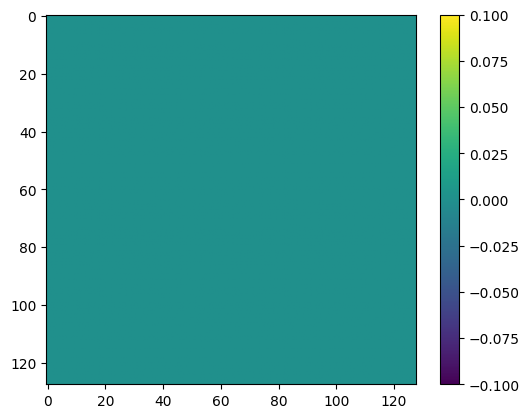

(4735, 128, 128)

In [220]:
plt.figure()
plt.imshow(testing_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
training_images.shape
# type(training_labels[1])

# Evaluate Test Cases

In [213]:
test_loss, test_acc = model.evaluate(testing_images,  testing_labels, verbose=2)

print('\nTest accuracy:', test_acc)

157/157 - 0s - loss: 1.0770 - accuracy: 1.0000 - 497ms/epoch - 3ms/step

Test accuracy: 1.0


# Make Predictions

In [215]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(testing_images)

print("Prediction: {:d}".format(np.argmax(predictions[0])))
print("Reality: {:d}".format(testing_labels[0]))

157/157 [==============================] - 0s 2ms/step
Prediction: 0
Reality: 0


# Plotting results

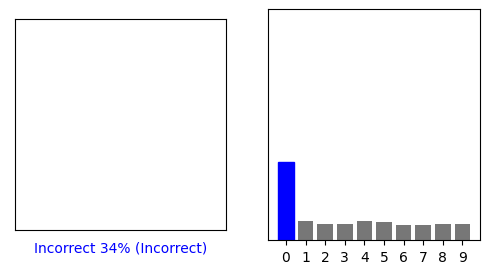

In [219]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], testing_labels, testing_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  testing_labels)
plt.show()

Plot the first X test images, their predicted labels, and the true labels.  
Color correct predictions in blue and incorrect predictions in red.

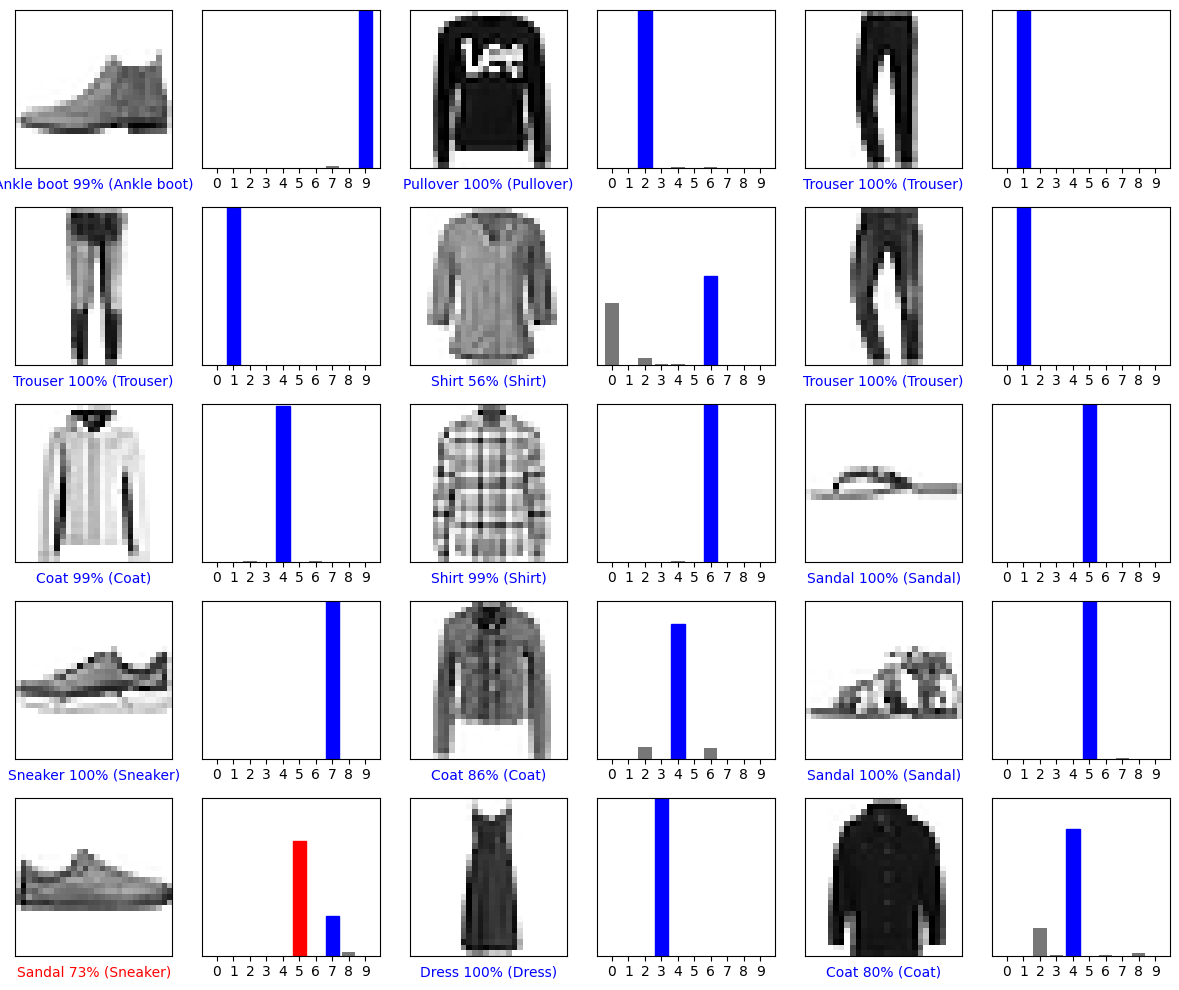

In [52]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Using the trained model

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 21ms/step
[[2.6505168e-05 1.7231004e-10 9.9730659e-01 2.8972178e-08 8.3957607e-04
  3.3208446e-13 1.8273024e-03 1.7699518e-17 1.0328545e-10 2.8447535e-12]]


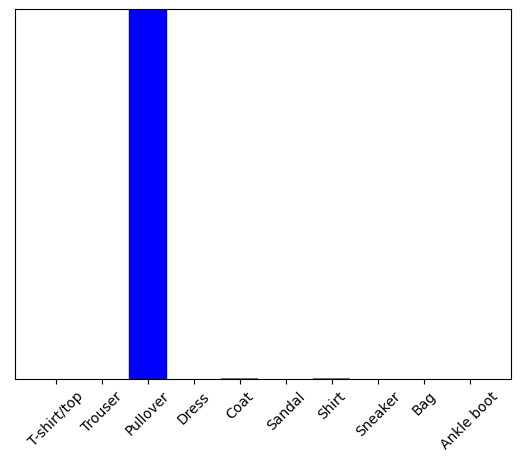

In [57]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

# Now predict the correct label for this image:

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])
plt.show()

# License info
Not my work

In [ ]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.